# **1. Business Understanding**

## **Project Overview**
A Sales and Inventory Forecasting System was developed to help retail and product-driven businesses anticipate future demand, optimize stock levels, and support strategic decision-making. Accurate forecasting enables improved budgeting, efficient purchasing cycles, and prevention of operational risks such as stock-outs and overstocking. By analyzing historical sales and inventory movement over an 18-month period, the system identifies patterns, detects seasonality, and predicts future behavior across hundreds of products.

## **1.1 Business Problem**
Retail operations frequently encounter uncertainty in customer demand, fluctuating sales volumes, and inconsistent supplier lead times. Without data-driven forecasting, businesses may face:

- Stock-outs during high-demand periods  
- Overstocking that ties up capital and increases storage costs  
- Poor financial planning and inaccurate budgeting  
- Reduced ability to respond to market changes  

A forecasting system provides visibility into future demand and stock requirements, reducing operational risk.

## **1.2 Project Objectives**
The forecasting system is designed to:

- Predict monthly sales for each product  
- Forecast revenue trends across the business  
- Estimate future inventory requirements  
- Identify products at risk of depletion or overstocking  
- Support budgeting, procurement planning, and operational strategy  

These objectives ensure that sales performance, stock movement, and purchasing decisions are aligned with future expectations.

## **1.3 Key Business Questions**
The system aims to answer several critical operational and financial questions:

- What are the expected sales levels over the next 3, 6, and 12 months?  
- Which products are experiencing growth or decline?  
- When will current stock fall below reorder thresholds?  
- How much inventory should be replenished, and when?  
- Which suppliers contribute to delays due to long lead times?  

Answering these questions strengthens both operational decision-making and financial forecasting.

## **1.4 Success Criteria**
The project is considered successful if:

- Forecasting accuracy meets acceptable business thresholds  
  (for example, MAPE < 20%, depending on product behavior)  
- Sales, revenue, and stock forecasts are clear and actionable  
- Operational users can identify inventory risks early  
- A dashboard enables leaders to visualize trends and predictions  
- The forecasting results support data-driven procurement and budgeting  

## **Key Highlights**
- End-to-end forecasting pipeline covering sales, revenue, and inventory  
- 18 months of synthetic but realistic daily transactional data  
- Multi-table relational database reflecting real business operations  
- Forecasts support strategic planning, purchasing, and stock control  
- Designed for scalability to hundreds of products and multiple suppliers  


# **2. Data Understanding**

## **Overview of the Dataset**
The project uses a multi-table relational dataset designed to resemble a real retail or product-based business. The data spans an 18-month period and includes detailed information about products, daily sales transactions, supplier performance, and inventory conditions. Understanding the structure of these datasets is essential for detecting patterns, identifying trends, validating data quality, and selecting the appropriate forecasting techniques.

## **2.1 Data Sources / Tables**
Four primary tables form the foundation of the forecasting system:

### **A. Products Table**
Contains core product attributes used for sales forecasting, pricing analysis, and inventory planning.

**Key Columns**
- `product_id`  
- `product_name`  
- `category`  
- `brand`  
- `sku_code`  
- `cost_price`  
- `selling_price`  
- `weight_kg`  
- `dimensions`  
- `launch_date`  
- `discontinued` (0/1)

These attributes enable advanced analytics such as product lifecycle evaluation, category-level performance, and profitability estimation.

### **B. Sales Table (Daily Transaction Data)**
Captures every sales transaction over the 18-month period, enriched with customer, pricing, and operational details. This table is the core source for identifying demand patterns, seasonality, and price-driven behavior.

**Key Columns**
- `sale_id`  
- `product_id`  
- `sale_date`  
- `quantity_sold`  
- `selling_price_at_time`  
- `revenue`  
- `profit`  
- `customer_type` (retail, wholesale, online, store)  
- `region` (Nairobi, Mombasa, Kisumu, etc.)  
- `payment_method` (cash, mpesa, card, transfer)  
- `discount_applied`  
- `order_channel` (website, app, store)  
- `promotion_flag` (0/1)

This table supports analysis of demand shifts, pricing effects, regional behavior, and channel performance.

### **C. Inventory Table**
Provides operational stock information and logistics-related attributes that help determine inventory stability and future replenishment requirements.

**Key Columns**
- `product_id`  
- `current_stock`  
- `reorder_level`  
- `safety_stock`  
- `lead_time_days`  
- `last_restock_date`  
- `warehouse_location`  
- `max_capacity`  
- `stock_value`

This table supports forecasting stock depletion, identifying risks, and optimizing purchases.

### **D. Suppliers Table**
Contains supplier details used to model lead times, delivery reliability, and sourcing impact on forecasting.

**Key Columns**
- `supplier_id`  
- `supplier_name`  
- `contact_email`  
- `country`  
- `delivery_lead_time_days`  
- `reliability_score`

This enables simulation of supply chain delays and supplier performance trends.

## **2.2 Entity Relationship (ER) Structure**
The relational database follows a clean and scalable structure suitable for forecasting and operational analytics.

**Core Relationships**
- `Products.product_id` → `Sales.product_id`  
  (Each product has many sales records)

- `Products.product_id` → `Inventory.product_id`  
  (Each product has one inventory profile)

- `Suppliers.supplier_id` → `Products.supplier_id`  
  (Each product is linked to a supplier)

This design ensures data integrity and supports complex joins for forecasting, trend detection, and inventory risk analysis.

## **2.3 Initial Data Exploration Approach**
Before modeling, exploratory checks are performed to validate the generated dataset:

### **A. Date Range Checks**
- Identify earliest and latest `sale_date`  
- Confirm full 18-month coverage  
- Detect gaps or inconsistencies in the daily timeline  

### **B. Row Count Checks**
Expected approximate sizes:
- Products: *200–300 items*  
- Inventory: *same number of products*  
- Suppliers: *20–30 suppliers*  
- Sales: *3,000–5,000 daily transactions (randomized)*  

### **C. Sample Data Previews**
Preview the first rows from each table to confirm:
- Correct column names and formats  
- Realistic pricing and quantity distributions  
- Accurate foreign key relationships  
- Randomized, non-sequential ordering of sales  

## **2.4 Understanding Sales Patterns**
Several aspects of the daily sales data are examined prior to modeling:

- Frequency and randomness of transactions  
- Product-level demand variability  
- Seasonal patterns or spikes  
- Regional differences  
- Effects of promotions, discounts, or channels  

These patterns guide the selection of forecasting models and feature engineering strategies.

## **Key Highlights**
- Multi-table relational structure representing real retail operations  
- Detailed daily sales spanning 18 months  
- Randomized and unsorted transactions for realistic behavior  
- Comprehensive product, supplier, and inventory attributes  
- Designed for advanced forecasting and inventory optimization  


# **3. Data Preparation**

## **Overview**
This stage establishes the structured foundation used for analysis, forecasting, and dashboard development. It involves creating the relational database schema, generating synthetic but realistic datasets, enforcing data quality standards, and transforming the raw data into analytical formats. A clean, well-organized dataset ensures that forecasting models receive accurate and consistent input.

## **3.1 Creating the Database Structure**
A complete relational database schema is prepared to support sales forecasting, inventory planning, and supplier performance analysis. Four main tables are constructed:

### **A. Products Table**
Defines foundational product characteristics, including:
- Category and brand information  
- SKU codes and physical attributes  
- Pricing and lifecycle status  
- Supplier linkage  

This table enables product-level forecasting and inventory evaluation.

### **B. Sales Table**
Stores granular daily sales transactions across an 18-month period.  
Attributes include:
- Quantities sold  
- Sales price at time of transaction  
- Revenue and profit calculations  
- Customer, region, payment method, and channel identifiers  
- Promotion and discount usage  

This table is the primary source for demand analytics.

### **C. Inventory Table**
Represents product-level inventory conditions with:
- Current stock  
- Safety levels  
- Lead times  
- Restock dates  
- Warehouse capacity metrics  

This table is used to evaluate inventory health and predict stock depletion.

### **D. Suppliers Table**
Captures supplier performance with:
- Lead time behavior  
- Delivery reliability  
- Country of origin  
- Supplier contact details  

This supports inventory optimization and restocking logic.

## **3.2 Cleaning and Validating Source Data**
Before loading data for modeling, several quality checks are performed:

### **A. Column Type Verification**
- Dates converted to valid date formats  
- Prices stored as numeric values  
- Categorical entries standardized (e.g., payment methods, regions, channels)

### **B. Removing Irregularities**
- Invalid or impossible dates  
- Negative quantities  
- Inconsistent pricing or discounts  
- Missing or mismatched product references  

### **C. Ensuring Referential Integrity**
To maintain a reliable relational structure:
- Every `Sales.product_id` must exist in `Products`  
- Every `Inventory.product_id` must exist in `Products`  
- Every `Products.supplier_id` must correspond to a record in `Suppliers`  

Maintaining strict integrity ensures accurate joins and prevents misleading results during analysis.

## **3.3 Transforming Sales Data for Forecasting**
Raw daily transactions are not directly used for forecasting. They must be aggregated and reshaped into structured time-series datasets.

### **A. Converting Daily Sales → Monthly Sales**
Daily-level data is grouped into monthly totals for each product:

**Aggregated Metrics**
- Total monthly quantity sold  
- Total monthly revenue  
- Total monthly profit  
- Number of monthly transactions  
- Average monthly discount  
- Dominant sales region  
- Promotion activity indicators  

Monthly-level formatting simplifies forecasting and captures broader trends.

### **B. Filling Missing Months**
In time-series forecasting, each product must have:
- A continuous sequence of months  
- No gaps in the timeline  
- Zero-sales months recorded explicitly  

Missing periods are filled to ensure uniform modeling.

### **C. Creating Modeling Tables**
Several structured modeling datasets are produced:

#### **1. `monthly_sales`**
Includes:
- `product_id`  
- `year_month`  
- Monthly quantity, revenue, profit  
- Discount and promotion indicators  
- Region dominance  

#### **2. `monthly_inventory_snapshot`**
Includes:
- Starting and ending monthly stock  
- Lead times  
- Stock-out flags  
- Inventory turnover metrics  

#### **3. `product_master`**
A consolidated reference table including:
- Category, brand, SKU codes  
- Cost and selling price  
- Supplier information  
- Physical attributes  

These datasets serve as the primary inputs for feature engineering and forecasting.

## **3.4 Data Quality Assessment Before Modeling**
Before advancing to feature engineering and modeling, the prepared datasets undergo several checks:

- Confirm that all products have continuous 18-month timelines  
- Verify that aggregated monthly sales align with daily totals  
- Detect outliers or extreme spikes in demand  
- Confirm no missing product or supplier references  
- Validate the range and distribution of prices, discounts, and quantities  

Ensuring quality at this stage reduces model errors and increases forecasting accuracy.

## **Key Highlights**
- Fully structured relational schema reflecting real retail operations  
- Cleaned and validated synthetic datasets ensuring reliability  
- Daily sales transformed into monthly analytical formats  
- Missing months filled for stable time-series forecasting  
- Modeling-ready datasets created for product-level and category-level analysis  


In [3]:
# Imports and lookup lists

import pandas as pd
import numpy as np
import sqlite3
import random
from datetime import datetime, timedelta

# For full randomness across the dataset
np.random.seed(42)
random.seed(42)

# Lookup Lists (Static Values)

categories = [
    "Electronics", "Home Appliances", "Beauty & Personal Care", "Groceries",
    "Office Supplies", "Kitchenware", "Sports Equipment", "Clothing",
    "Footwear", "Toys", "Automotive", "Health Products"
]

brands = [
    "NovaTech", "PrimePro", "EcoLine", "UltraHome", "Zenith", "BrightPlus",
    "FlexiStore", "ApexGear", "PureEssence", "UrbanStyle"
]

regions = [
    "Nairobi", "Mombasa", "Kisumu", "Nakuru", "Eldoret", "Thika"
]

payment_methods = [
    "Cash", "Mpesa", "Card", "Bank Transfer"
]

customer_types = [
    "Retail", "Wholesale", "Online", "Walk-in"
]

order_channels = [
    "Website", "App", "Physical Store"
]

supplier_names = [
    "Kenya Distributors Ltd", "Prime Imports", "EastAfrica Supply Co",
    "Urban Retail Logistics", "GlobalMart Partners", "AfriTrade Solutions",
    "SupplyLink Movers", "ProSource Traders", "Zen Wholesale Group"
]

print("Lookup lists created successfully.")


Lookup lists created successfully.


In [4]:
#Generate products table
num_products = 300

# Function to generate random product names
def generate_product_name():
    adjectives = [
        "Premium", "Advanced", "Eco", "Ultra", "Smart", "Compact",
        "Portable", "Durable", "Enhanced", "Pro", "Lite", "Classic"
    ]
    items = [
        "Blender", "TV", "Laptop", "Notebook", "Shoes", "Backpack", "Perfume",
        "Headphones", "Iron Box", "Frying Pan", "Sports Bottle", "Desk Lamp",
        "Hand Mixer", "Electric Kettle", "Hair Dryer", "Vacuum Cleaner",
        "Soccer Ball", "Yoga Mat", "T-shirt", "Wireless Charger", "Keyboard"
    ]
    return f"{random.choice(adjectives)} {random.choice(items)}"

# Generate product attributes
product_ids = np.arange(1, num_products + 1)
product_names = [generate_product_name() for _ in range(num_products)]
product_categories = np.random.choice(categories, num_products)
product_brands = np.random.choice(brands, num_products)
product_suppliers = np.random.choice(np.arange(1, len(supplier_names) + 1), num_products)

# Random pricing logic
cost_prices = np.round(np.random.uniform(200, 15000, num_products), 2)
selling_prices = np.round(cost_prices * np.random.uniform(1.1, 1.8, num_products), 2)

# Random weight and dimensions
weights = np.round(np.random.uniform(0.1, 10.0, num_products), 2)
dimensions = [f"{np.random.randint(5,50)}x{np.random.randint(5,50)}x{np.random.randint(5,50)} cm"
              for _ in range(num_products)]

# Random launch dates (within the last 3 years)
start_date = datetime(2021, 1, 1)
launch_dates = [start_date + timedelta(days=random.randint(0, 900)) for _ in range(num_products)]
launch_dates = [d.strftime("%Y-%m-%d") for d in launch_dates]

# Random discontinued flag (10% discontinued)
discontinued_flags = np.random.choice([0, 1], num_products, p=[0.9, 0.1])

# SKU codes
sku_codes = [f"SKU-{random.randint(100000,999999)}" for _ in range(num_products)]

# Reorder & safety stock
reorder_points = np.random.randint(10, 200, num_products)
safety_stocks = np.random.randint(5, 120, num_products)

# Create products DataFrame
df_products = pd.DataFrame({
    "product_id": product_ids,
    "product_name": product_names,
    "category": product_categories,
    "brand": product_brands,
    "sku_code": sku_codes,
    "cost_price": cost_prices,
    "selling_price": selling_prices,
    "weight_kg": weights,
    "dimensions": dimensions,
    "launch_date": launch_dates,
    "discontinued": discontinued_flags,
    "supplier_id": product_suppliers,
    "reorder_level": reorder_points,
    "safety_stock": safety_stocks
})

# Shuffle rows so data is NOT in any order
df_products = df_products.sample(frac=1).reset_index(drop=True)

df_products.head()

,product_id,product_name,category,brand,sku_code,cost_price,selling_price,weight_kg,dimensions,launch_date,discontinued,supplier_id,reorder_level,safety_stock
0,56,Eco Iron Box,Toys,NovaTech,SKU-650121,1930.09,3304.88,8.68,16x36x36 cm,2021-11-24,0,6,145,118
1,98,Lite Vacuum Cleaner,Health Products,PureEssence,SKU-177680,7687.15,11726.10,1.78,5x27x41 cm,2023-01-23,0,1,68,79
2,11,Premium Yoga Mat,Automotive,ApexGear,SKU-931450,14851.41,23185.25,8.72,26x10x6 cm,2021-05-05,0,8,197,79
3,60,Classic T-shirt,Home Appliances,PureEssence,SKU-973074,2261.23,4066.94,4.92,33x47x6 cm,2021-06-04,0,9,36,109
4,219,Premium Frying Pan,Clothing,PrimePro,SKU-901909,6259.29,10367.68,0.28,9x6x26 cm,2021-05-04,0,3,66,72


In [6]:
# Generate 18-month daily date range 
start_date = datetime(2023, 1, 1)
end_date = start_date + timedelta(days=18 * 30)  # ~18 months approx

# Generate full daily timeline
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Convert to strings for easier dataset merging
dates_list = [d.strftime("%Y-%m-%d") for d in date_range]

# Shuffle the dates so they are NOT in order
random.shuffle(dates_list)

print("Total dates generated:", len(dates_list))
print("Sample dates:", dates_list[:10])


Total dates generated: 541
Sample dates: ['2023-07-23', '2023-01-31', '2023-07-07', '2023-07-09', '2023-04-14', '2023-09-09', '2024-03-23', '2024-05-19', '2023-08-28', '2023-07-13']


In [7]:
# PART 4: GENERATE DAILY SALES TABLE (3,000–5,000 ROWS)

# Number of daily sales transactions to generate
num_sales = random.randint(3000, 5000)

# Prepare empty lists
sale_ids = np.arange(1, num_sales + 1)
product_ids_list = np.random.choice(df_products["product_id"], num_sales)
quantities = np.random.randint(1, 10, num_sales)  # quantity sold per transaction
customer_type_list = np.random.choice(customer_types, num_sales)
region_list = np.random.choice(regions, num_sales)
payment_list = np.random.choice(payment_methods, num_sales)
channel_list = np.random.choice(order_channels, num_sales)

# Random discounts and promotions
discounts = np.round(np.random.uniform(0, 0.25, num_sales), 2)
promotion_flags = np.random.choice([0, 1], num_sales, p=[0.85, 0.15])  # 15% chance of promotion

# Assign random sale dates from shuffled 18-month timeline
sale_dates = np.random.choice(dates_list, num_sales)

# Determine selling price at time of sale (random fluctuation)
selling_prices_at_time = []
profits = []

for pid, qty, disc in zip(product_ids_list, quantities, discounts):
    base_price = df_products.loc[df_products["product_id"] == pid, "selling_price"].values[0]
    price_after_discount = base_price * (1 - disc)
    selling_prices_at_time.append(round(price_after_discount, 2))

    cost_price = df_products.loc[df_products["product_id"] == pid, "cost_price"].values[0]
    profit_per_unit = price_after_discount - cost_price
    profits.append(round(profit_per_unit * qty, 2))

# Total revenue per transaction
revenues = [round(q * p, 2) for q, p in zip(quantities, selling_prices_at_time)]

# Create final sales DataFrame
df_sales = pd.DataFrame({
    "sale_id": sale_ids,
    "product_id": product_ids_list,
    "sale_date": sale_dates,
    "quantity_sold": quantities,
    "selling_price_at_time": selling_prices_at_time,
    "revenue": revenues,
    "profit": profits,
    "customer_type": customer_type_list,
    "region": region_list,
    "payment_method": payment_list,
    "order_channel": channel_list,
    "discount_applied": discounts,
    "promotion_flag": promotion_flags
})

# Shuffle rows so the entire dataset is NOT ordered
df_sales = df_sales.sample(frac=1).reset_index(drop=True)

df_sales.head()


,sale_id,product_id,sale_date,quantity_sold,selling_price_at_time,revenue,profit,customer_type,region,payment_method,order_channel,discount_applied,promotion_flag
0,1563,165,2023-06-07,1,1300.60,1300.60,128.11,Retail,Thika,Cash,Website,0.01,0
1,4024,122,2023-05-29,5,9794.04,48970.20,4215.79,Wholesale,Eldoret,Bank Transfer,App,0.06,0
2,1494,264,2024-01-11,7,2315.48,16208.36,-2418.54,Retail,Eldoret,Mpesa,Physical Store,0.24,1
3,3832,165,2023-07-22,9,1024.72,9222.48,-1329.96,Retail,Kisumu,Mpesa,Physical Store,0.22,0
4,1831,209,2024-05-16,9,10423.62,93812.58,14351.38,Wholesale,Nakuru,Cash,App,0.11,0


In [8]:
#Generate Inventory Master Table
#Warehouse locations
warehouses = ["Main Warehouse", "Industrial Area Depot", "CBD Storage", "Westlands Hub"]

inventory_records = []

for _, row in df_products.iterrows():
    product_id = row["product_id"]
    cost_price = row["cost_price"]

    # Random stock levels
    current_stock = np.random.randint(20, 1000)             # current quantity on-hand
    reorder_level = row["reorder_level"]                    # already randomized earlier
    safety_stock = row["safety_stock"]                      # from products table
    lead_time_days = np.random.randint(3, 30)               # supplier delivery time
    max_capacity = np.random.randint(500, 2000)             # warehouse capacity per product

    # Last restock date: random date in the last 180 days
    last_restock = datetime.now() - timedelta(days=np.random.randint(1, 180))
    last_restock = last_restock.strftime("%Y-%m-%d")

    # Stock value = current stock × cost price
    stock_value = round(current_stock * cost_price, 2)

    inventory_records.append([
        product_id,
        current_stock,
        reorder_level,
        safety_stock,
        lead_time_days,
        last_restock,
        np.random.choice(warehouses),
        max_capacity,
        stock_value
    ])

df_inventory = pd.DataFrame(
    inventory_records,
    columns=[
        "product_id",
        "current_stock",
        "reorder_level",
        "safety_stock",
        "lead_time_days",
        "last_restock_date",
        "warehouse_location",
        "max_capacity",
        "stock_value"
    ]
)

# Shuffle inventory rows to avoid any natural ordering
df_inventory = df_inventory.sample(frac=1).reset_index(drop=True)

df_inventory.head()


,product_id,current_stock,reorder_level,safety_stock,lead_time_days,last_restock_date,warehouse_location,max_capacity,stock_value
0,145,541,121,100,27,2025-10-07,Westlands Hub,541,5170612.91
1,108,466,114,72,16,2025-11-17,Westlands Hub,1474,4067746.62
2,102,40,168,99,18,2025-06-16,Westlands Hub,1213,559814.00
3,278,972,66,114,9,2025-11-13,CBD Storage,534,10732892.04
4,137,844,181,84,15,2025-11-16,CBD Storage,595,5820308.40


In [11]:
#Generate suppliers table
# Supplier countries list
supplier_countries = [
    "Kenya", "China", "India", "United Arab Emirates", "Turkey",
    "South Africa", "United Kingdom"
]

supplier_records = []

for supplier_id, supplier_name in enumerate(supplier_names, start=1):
    contact_email = supplier_name.lower().replace(" ", "_") + "@supplier.com"

    # Random delivery lead time
    delivery_lead_time = np.random.randint(3, 35)  # between 3–35 days

    # Random reliability score (0.5 to 1.0)
    reliability_score = round(np.random.uniform(0.5, 1.0), 2)

    # Random country of origin
    country = np.random.choice(supplier_countries)

    supplier_records.append([
        supplier_id,
        supplier_name,
        contact_email,
        country,
        delivery_lead_time,
        reliability_score
    ])

df_suppliers = pd.DataFrame(
    supplier_records,
    columns=[
        "supplier_id",
        "supplier_name",
        "contact_email",
        "country",
        "delivery_lead_time_days",
        "reliability_score"
    ]
)

# Shuffle to avoid natural order
df_suppliers = df_suppliers.sample(frac=1).reset_index(drop=True)

df_suppliers.head()


,supplier_id,supplier_name,contact_email,country,delivery_lead_time_days,reliability_score
0,7,SupplyLink Movers,supplylink_movers@supplier.com,United Kingdom,29,0.80
1,2,Prime Imports,prime_imports@supplier.com,China,11,0.61
2,9,Zen Wholesale Group,zen_wholesale_group@supplier.com,Kenya,23,0.58
3,1,Kenya Distributors Ltd,kenya_distributors_ltd@supplier.com,Kenya,18,0.98
4,4,Urban Retail Logistics,urban_retail_logistics@supplier.com,United Arab Emirates,18,0.99


In [12]:
#Generate purchases (Restock events)
# Number of restock purchase orders to generate
num_purchases = random.randint(600, 1200)   # fairly large & realistic

purchase_records = []

for purchase_id in range(1, num_purchases + 1):

    # Random product
    product_row = df_products.sample(1).iloc[0]
    product_id = product_row["product_id"]
    supplier_id = product_row["supplier_id"]

    # Random quantity ordered
    quantity_ordered = np.random.randint(50, 1000)

    # Random purchase date (within the 18-month window)
    purchase_date = pd.to_datetime(np.random.choice(dates_list))

    # Supplier lead time
    supplier_lead_time = df_suppliers.loc[
        df_suppliers["supplier_id"] == supplier_id,
        "delivery_lead_time_days"
    ].values[0]

    # Delivery date = purchase_date + lead_time
    delivery_date = purchase_date + timedelta(days=int(supplier_lead_time))

    purchase_records.append([
        purchase_id,
        product_id,
        supplier_id,
        quantity_ordered,
        purchase_date.strftime("%Y-%m-%d"),
        delivery_date.strftime("%Y-%m-%d")
    ])

df_purchases = pd.DataFrame(
    purchase_records,
    columns=[
        "purchase_id",
        "product_id",
        "supplier_id",
        "quantity_ordered",
        "purchase_date",
        "delivery_date"
    ]
)

# Shuffle dataset to ensure no natural order
df_purchases = df_purchases.sample(frac=1).reset_index(drop=True)

df_purchases.head()


,purchase_id,product_id,supplier_id,quantity_ordered,purchase_date,delivery_date
0,146,98,1,109,2024-05-09,2024-05-27
1,951,89,8,318,2024-03-01,2024-03-11
2,386,191,5,972,2023-01-04,2023-01-21
3,249,284,8,187,2024-05-13,2024-05-23
4,788,263,6,580,2023-07-30,2023-08-13


In [13]:
#Generate daily inventory snapshots for each product
# Convert dates back to sorted list for sequential inventory simulation
sorted_dates = sorted(pd.to_datetime(dates_list))

inventory_snapshots = []

# Pre-calculate sales grouped by product and date for efficiency
sales_grouped = df_sales.groupby(["product_id", "sale_date"])["quantity_sold"].sum()

# Pre-calculate incoming purchases grouped by product and delivery date
purchases_grouped = df_purchases.groupby(["product_id", "delivery_date"])["quantity_ordered"].sum()

# Start daily simulation
for _, product_row in df_products.iterrows():

    product_id = product_row["product_id"]
    
    # Start with current stock from inventory master
    stock_level = int(df_inventory.loc[df_inventory["product_id"] == product_id, "current_stock"].values[0])
    
    # Simulate day-by-day changes
    for date in sorted_dates:
        date_str = date.strftime("%Y-%m-%d")

        # Subtract total sales on this date
        if (product_id, date_str) in sales_grouped.index:
            stock_level -= int(sales_grouped.loc[(product_id, date_str)])

        # Add incoming deliveries on this date
        if (product_id, date_str) in purchases_grouped.index:
            stock_level += int(purchases_grouped.loc[(product_id, date_str)])

        # Natural random fluctuation (spoilage/damage/adjustment)
        stock_level += np.random.randint(-2, 3)

        # Prevent negative stock
        stock_level = max(stock_level, 0)

        # Record snapshot
        inventory_snapshots.append([
            product_id,
            date_str,
            stock_level
        ])

# Create DataFrame
df_daily_inventory = pd.DataFrame(
    inventory_snapshots,
    columns=["product_id", "date", "stock_on_hand"]
)

# Shuffle to ensure daily rows are NOT in order
df_daily_inventory = df_daily_inventory.sample(frac=1).reset_index(drop=True)

df_daily_inventory.head()


,product_id,date,stock_on_hand
0,255,2024-03-03,31
1,39,2023-06-21,1332
2,151,2024-05-10,1573
3,110,2023-06-25,322
4,272,2024-04-27,1444


In [14]:
#Save all tables to sqlite database

db_name = "sales_inventory_forecasting.db"

# Create / connect to SQLite database
conn = sqlite3.connect(db_name)

# Save each DataFrame as a table
df_products.to_sql("Products", conn, if_exists="replace", index=False)
df_sales.to_sql("Sales", conn, if_exists="replace", index=False)
df_inventory.to_sql("Inventory", conn, if_exists="replace", index=False)
df_daily_inventory.to_sql("DailyInventory", conn, if_exists="replace", index=False)
df_suppliers.to_sql("Suppliers", conn, if_exists="replace", index=False)
df_purchases.to_sql("Purchases", conn, if_exists="replace", index=False)

# Quick row count check for each table
tables = ["Products", "Sales", "Inventory", "DailyInventory", "Suppliers", "Purchases"]
for table in tables:
    count = pd.read_sql_query(f"SELECT COUNT(*) AS row_count FROM {table};", conn)
    print(f"Table {table}: {count['row_count'][0]} rows")

conn.close()
print(f"\nAll tables saved successfully to '{db_name}'.")


Table Products: 300 rows
Table Sales: 4625 rows
Table Inventory: 300 rows
Table DailyInventory: 162300 rows
Table Suppliers: 9 rows
Table Purchases: 970 rows

All tables saved successfully to 'sales_inventory_forecasting.db'.


# **4. Exploratory Data Analysis (EDA)**

## **Overview**
Exploratory Data Analysis provides an initial understanding of the structure, patterns, and behaviors within the dataset. This section examines product distribution, sales activity, category performance, regional dynamics, and inventory movement over the 18-month period.

Key objectives include:
- Validating data accuracy and completeness  
- Identifying top-performing products and categories  
- Understanding regional and channel variations  
- Detecting seasonal or time-based patterns  
- Highlighting inventory risks and stock-out indicators  


In [15]:
#Load data from sqlite

import sqlite3

# Connect to the same database created earlier
conn = sqlite3.connect("sales_inventory_forecasting.db")

# Load all tables into DataFrames
eda_products = pd.read_sql_query("SELECT * FROM Products;", conn)
eda_sales = pd.read_sql_query("SELECT * FROM Sales;", conn)
eda_inventory = pd.read_sql_query("SELECT * FROM Inventory;", conn)
eda_daily_inventory = pd.read_sql_query("SELECT * FROM DailyInventory;", conn)
eda_suppliers = pd.read_sql_query("SELECT * FROM Suppliers;", conn)
eda_purchases = pd.read_sql_query("SELECT * FROM Purchases;", conn)

conn.close()

# Display loaded tables
eda_products.head(), eda_sales.head()


(   product_id         product_name         category        brand    sku_code  \
 0          56         Eco Iron Box             Toys     NovaTech  SKU-650121   
 1          98  Lite Vacuum Cleaner  Health Products  PureEssence  SKU-177680   
 2          11     Premium Yoga Mat       Automotive     ApexGear  SKU-931450   
 3          60      Classic T-shirt  Home Appliances  PureEssence  SKU-973074   
 4         219   Premium Frying Pan         Clothing     PrimePro  SKU-901909   
 
    cost_price  selling_price  weight_kg   dimensions launch_date  \
 0     1930.09        3304.88       8.68  16x36x36 cm  2021-11-24   
 1     7687.15       11726.10       1.78   5x27x41 cm  2023-01-23   
 2    14851.41       23185.25       8.72   26x10x6 cm  2021-05-05   
 3     2261.23        4066.94       4.92   33x47x6 cm  2021-06-04   
 4     6259.29       10367.68       0.28    9x6x26 cm  2021-05-04   
 
    discontinued  supplier_id  reorder_level  safety_stock  
 0             0            6      

In [16]:
#Basic table structure and summary
print("Products:", eda_products.shape)
print("Sales:", eda_sales.shape)
print("Inventory:", eda_inventory.shape)
print("DailyInventory:", eda_daily_inventory.shape)
print("Suppliers:", eda_suppliers.shape)
print("Purchases:", eda_purchases.shape)

display(eda_products.head())
display(eda_sales.head())
display(eda_inventory.head())


Products: (300, 14)
Sales: (4625, 13)
Inventory: (300, 9)
DailyInventory: (162300, 3)
Suppliers: (9, 6)
Purchases: (970, 6)


,product_id,product_name,category,brand,sku_code,cost_price,selling_price,weight_kg,dimensions,launch_date,discontinued,supplier_id,reorder_level,safety_stock
0,56,Eco Iron Box,Toys,NovaTech,SKU-650121,1930.09,3304.88,8.68,16x36x36 cm,2021-11-24,0,6,145,118
1,98,Lite Vacuum Cleaner,Health Products,PureEssence,SKU-177680,7687.15,11726.10,1.78,5x27x41 cm,2023-01-23,0,1,68,79
2,11,Premium Yoga Mat,Automotive,ApexGear,SKU-931450,14851.41,23185.25,8.72,26x10x6 cm,2021-05-05,0,8,197,79
3,60,Classic T-shirt,Home Appliances,PureEssence,SKU-973074,2261.23,4066.94,4.92,33x47x6 cm,2021-06-04,0,9,36,109
4,219,Premium Frying Pan,Clothing,PrimePro,SKU-901909,6259.29,10367.68,0.28,9x6x26 cm,2021-05-04,0,3,66,72


,sale_id,product_id,sale_date,quantity_sold,selling_price_at_time,revenue,profit,customer_type,region,payment_method,order_channel,discount_applied,promotion_flag
0,1563,165,2023-06-07,1,1300.60,1300.60,128.11,Retail,Thika,Cash,Website,0.01,0
1,4024,122,2023-05-29,5,9794.04,48970.20,4215.79,Wholesale,Eldoret,Bank Transfer,App,0.06,0
2,1494,264,2024-01-11,7,2315.48,16208.36,-2418.54,Retail,Eldoret,Mpesa,Physical Store,0.24,1
3,3832,165,2023-07-22,9,1024.72,9222.48,-1329.96,Retail,Kisumu,Mpesa,Physical Store,0.22,0
4,1831,209,2024-05-16,9,10423.62,93812.58,14351.38,Wholesale,Nakuru,Cash,App,0.11,0


,product_id,current_stock,reorder_level,safety_stock,lead_time_days,last_restock_date,warehouse_location,max_capacity,stock_value
0,145,541,121,100,27,2025-10-07,Westlands Hub,541,5170612.91
1,108,466,114,72,16,2025-11-17,Westlands Hub,1474,4067746.62
2,102,40,168,99,18,2025-06-16,Westlands Hub,1213,559814.00
3,278,972,66,114,9,2025-11-13,CBD Storage,534,10732892.04
4,137,844,181,84,15,2025-11-16,CBD Storage,595,5820308.40


In [17]:
#Sales Distribution and summary statistics
# Convert sale_date to datetime for analysis
eda_sales["sale_date"] = pd.to_datetime(eda_sales["sale_date"])

# Summary statistics
sales_summary = eda_sales[["quantity_sold", "selling_price_at_time", "revenue", "profit"]].describe()

print("Summary Statistics for Sales:")
display(sales_summary)

# Distribution of quantity sold
quantity_distribution = eda_sales["quantity_sold"].value_counts().sort_index()

print("\nQuantity Sold Distribution:")
display(quantity_distribution)

# Distribution of revenue
print("\nRevenue Distribution Overview:")
print("Min:", eda_sales["revenue"].min())
print("Max:", eda_sales["revenue"].max())
print("Mean:", eda_sales["revenue"].mean())
print("Median:", eda_sales["revenue"].median())


Summary Statistics for Sales:


,quantity_sold,selling_price_at_time,revenue,profit
count,4625.000000,4625.000000,4625.000000,4625.000000
mean,5.018162,9473.139968,47457.252934,10243.468378
std,2.579048,5660.741087,40107.709699,13203.801686
min,1.000000,356.290000,389.540000,-12790.440000
25%,3.000000,4564.110000,14965.420000,1337.230000
50%,5.000000,9057.700000,35971.560000,5635.530000
75%,7.000000,13669.280000,70762.800000,14583.890000
max,9.000000,24148.420000,215459.730000,88874.010000



Quantity Sold Distribution:


quantity_sold
1    515
2    491
3    519
4    513
5    518
6    523
7    512
8    515
9    519
Name: count, dtype: int64


Revenue Distribution Overview:
Min: 389.54
Max: 215459.73
Mean: 47457.25293405405
Median: 35971.56


In [18]:
#Top selling products (quantity and revenue)
# Total quantity sold per product
product_sales_qty = (
    eda_sales.groupby("product_id")["quantity_sold"]
    .sum()
    .reset_index()
    .rename(columns={"quantity_sold": "total_quantity_sold"})
)

# Total revenue per product
product_sales_revenue = (
    eda_sales.groupby("product_id")["revenue"]
    .sum()
    .reset_index()
    .rename(columns={"revenue": "total_revenue"})
)

# Merge quantity + revenue + product name
top_products = (
    product_sales_qty.merge(product_sales_revenue, on="product_id")
    .merge(eda_products[["product_id", "product_name", "category", "brand"]], on="product_id")
)

# Sort descending by quantity sold
top_products_sorted = top_products.sort_values(by="total_quantity_sold", ascending=False).head(10)

print("Top 10 Best-Selling Products (by Quantity Sold):")
top_products_sorted


Top 10 Best-Selling Products (by Quantity Sold):


,product_id,total_quantity_sold,total_revenue,product_name,category,brand
92,93,162,1040628.11,Premium Headphones,Clothing,UrbanStyle
38,39,156,1333732.51,Ultra Iron Box,Beauty & Personal Care,BrightPlus
100,101,141,1989014.06,Pro Electric Kettle,Footwear,FlexiStore
83,84,140,1703368.00,Lite Soccer Ball,Groceries,UrbanStyle
111,112,137,2238717.75,Ultra T-shirt,Clothing,BrightPlus
232,233,128,1233558.59,Classic Notebook,Office Supplies,UrbanStyle
46,47,126,848967.50,Ultra Sports Bottle,Sports Equipment,PrimePro
222,223,126,2474303.32,Lite Notebook,Home Appliances,UrbanStyle
280,281,125,517212.72,Enhanced Vacuum Cleaner,Sports Equipment,UltraHome
182,183,125,1219883.81,Advanced Laptop,Sports Equipment,Zenith


In [19]:
#Category performance (quantity and revenue)
# Merge sales with product details to attach category info
sales_with_products = eda_sales.merge(
    eda_products[["product_id", "category"]],
    on="product_id",
    how="left"
)

# Total quantity sold per category
category_qty = (
    sales_with_products.groupby("category")["quantity_sold"]
    .sum()
    .reset_index()
    .rename(columns={"quantity_sold": "total_quantity_sold"})
)

# Total revenue per category
category_revenue = (
    sales_with_products.groupby("category")["revenue"]
    .sum()
    .reset_index()
    .rename(columns={"revenue": "total_revenue"})
)

# Combine both metrics
category_performance = category_qty.merge(category_revenue, on="category")

# Sort by revenue (highest → lowest)
category_performance_sorted = category_performance.sort_values(
    by="total_revenue", ascending=False
)

print("Category Performance Summary (Quantity & Revenue):")
category_performance_sorted


Category Performance Summary (Quantity & Revenue):


,category,total_quantity_sold,total_revenue
6,Health Products,2654,27665729.81
10,Sports Equipment,2433,23588749.34
4,Footwear,2106,21703826.06
1,Beauty & Personal Care,2078,19038303.90
2,Clothing,1958,18863187.10
0,Automotive,1871,17484894.99
3,Electronics,1929,16993562.75
5,Groceries,1922,16752865.70
9,Office Supplies,1534,16517390.20
11,Toys,1799,15031864.81


In [20]:
#Monthly sales trends (quantity and revenue)
# Ensure sale_date is datetime
eda_sales["sale_date"] = pd.to_datetime(eda_sales["sale_date"])

# Create year-month column
eda_sales["year_month"] = eda_sales["sale_date"].dt.to_period("M").astype(str)

# Monthly quantity sold
monthly_qty = (
    eda_sales.groupby("year_month")["quantity_sold"]
    .sum()
    .reset_index()
    .rename(columns={"quantity_sold": "total_monthly_quantity"})
)

# Monthly revenue
monthly_revenue = (
    eda_sales.groupby("year_month")["revenue"]
    .sum()
    .reset_index()
    .rename(columns={"revenue": "total_monthly_revenue"})
)

# Merge trends
monthly_trends = monthly_qty.merge(monthly_revenue, on="year_month")

# Sort by ascending date
monthly_trends = monthly_trends.sort_values("year_month")

print("Monthly Sales Trends (Quantity & Revenue):")
monthly_trends


Monthly Sales Trends (Quantity & Revenue):


,year_month,total_monthly_quantity,total_monthly_revenue
0,2023-01,1319,12688391.78
1,2023-02,1351,12743103.71
2,2023-03,1089,10417956.91
3,2023-04,1406,13273081.40
4,2023-05,1348,12574620.08
5,2023-06,1343,12394652.06
6,2023-07,1332,12247874.38
7,2023-08,1442,13712604.51
8,2023-09,1350,13174091.52
9,2023-10,1242,10976659.70


In [21]:
#Regional sales performance (quantity and revenue)
# Total quantity sold per region
region_qty = (
    eda_sales.groupby("region")["quantity_sold"]
    .sum()
    .reset_index()
    .rename(columns={"quantity_sold": "total_quantity_sold"})
)

# Total revenue per region
region_revenue = (
    eda_sales.groupby("region")["revenue"]
    .sum()
    .reset_index()
    .rename(columns={"revenue": "total_revenue"})
)

# Combine the metrics
regional_performance = region_qty.merge(region_revenue, on="region")

# Sort by revenue descending
regional_performance_sorted = regional_performance.sort_values(
    by="total_revenue", ascending=False
)

print("Regional Sales Performance (Quantity & Revenue):")
regional_performance_sorted


Regional Sales Performance (Quantity & Revenue):


,region,total_quantity_sold,total_revenue
2,Mombasa,4061,39931579.85
5,Thika,4008,37892524.39
3,Nairobi,3773,36524056.46
1,Kisumu,3893,36206096.58
4,Nakuru,3753,35620493.17
0,Eldoret,3721,33315044.37


In [22]:
#Inventory risk analysis
# Merge inventory with product metadata 
inventory_check = eda_inventory.merge(
    eda_products[["product_id", "product_name", "category", "brand"]],
    on="product_id",
    how="left"
)

# A. Products below safety stock
low_safety = inventory_check[
    inventory_check["current_stock"] < inventory_check["safety_stock"]
]

# B. Products below reorder level
below_reorder = inventory_check[
    inventory_check["current_stock"] < inventory_check["reorder_level"]
]

# C. Critical: Products at immediate stock-out risk
stock_out_risk = inventory_check[inventory_check["current_stock"] == 0]

# D. Potential overstock cases (current stock > 80% of max capacity)
overstock = inventory_check[
    inventory_check["current_stock"] > (0.8 * inventory_check["max_capacity"])
]

# Display results
print("Products Below Safety Stock:")
display(low_safety.head(10))

print("\nProducts Below Reorder Level:")
display(below_reorder.head(10))

print("\nProducts at Stock-out Risk (Zero Stock):")
display(stock_out_risk.head(10))

print("\nPotential Overstocked Products:")
display(overstock.head(10))


Products Below Safety Stock:


,product_id,current_stock,reorder_level,safety_stock,lead_time_days,last_restock_date,warehouse_location,max_capacity,stock_value,product_name,category,brand
2,102,40,168,99,18,2025-06-16,Westlands Hub,1213,559814.00,Ultra Yoga Mat,Sports Equipment,PureEssence
20,94,94,88,112,10,2025-07-25,Westlands Hub,716,661542.86,Pro Laptop,Toys,FlexiStore
77,18,30,32,63,20,2025-10-16,CBD Storage,1916,215379.90,Compact Iron Box,Kitchenware,EcoLine
92,180,60,50,105,10,2025-08-20,CBD Storage,1467,34543.20,Compact Laptop,Sports Equipment,FlexiStore
94,276,41,195,50,22,2025-10-11,Main Warehouse,907,410915.53,Ultra Electric Kettle,Automotive,UrbanStyle
97,291,44,68,65,8,2025-11-12,Industrial Area Depot,1162,331463.88,Premium Headphones,Home Appliances,FlexiStore
107,227,38,62,91,12,2025-09-24,Main Warehouse,906,281731.24,Ultra Backpack,Sports Equipment,UrbanStyle
120,269,95,171,97,6,2025-11-03,CBD Storage,1447,566350.10,Ultra Electric Kettle,Footwear,UltraHome
130,184,32,114,112,8,2025-11-09,Main Warehouse,1032,19232.64,Enhanced Perfume,Electronics,FlexiStore
213,105,31,107,74,8,2025-08-02,Westlands Hub,961,429442.69,Portable Keyboard,Electronics,NovaTech



Products Below Reorder Level:


,product_id,current_stock,reorder_level,safety_stock,lead_time_days,last_restock_date,warehouse_location,max_capacity,stock_value,product_name,category,brand
2,102,40,168,99,18,2025-06-16,Westlands Hub,1213,559814.00,Ultra Yoga Mat,Sports Equipment,PureEssence
36,155,119,192,92,16,2025-10-22,Westlands Hub,1646,1072392.30,Smart Perfume,Electronics,UrbanStyle
51,246,179,191,25,3,2025-06-28,CBD Storage,1358,761827.58,Advanced Iron Box,Office Supplies,EcoLine
57,150,119,195,47,5,2025-07-30,Industrial Area Depot,602,285624.99,Portable Iron Box,Toys,FlexiStore
77,18,30,32,63,20,2025-10-16,CBD Storage,1916,215379.90,Compact Iron Box,Kitchenware,EcoLine
94,276,41,195,50,22,2025-10-11,Main Warehouse,907,410915.53,Ultra Electric Kettle,Automotive,UrbanStyle
97,291,44,68,65,8,2025-11-12,Industrial Area Depot,1162,331463.88,Premium Headphones,Home Appliances,FlexiStore
107,227,38,62,91,12,2025-09-24,Main Warehouse,906,281731.24,Ultra Backpack,Sports Equipment,UrbanStyle
110,149,129,154,69,18,2025-09-02,Industrial Area Depot,1243,1860675.36,Portable Blender,Footwear,Zenith
120,269,95,171,97,6,2025-11-03,CBD Storage,1447,566350.10,Ultra Electric Kettle,Footwear,UltraHome



Products at Stock-out Risk (Zero Stock):


,product_id,current_stock,reorder_level,safety_stock,lead_time_days,last_restock_date,warehouse_location,max_capacity,stock_value,product_name,category,brand



Potential Overstocked Products:


,product_id,current_stock,reorder_level,safety_stock,lead_time_days,last_restock_date,warehouse_location,max_capacity,stock_value,product_name,category,brand
0,145,541,121,100,27,2025-10-07,Westlands Hub,541,5170612.91,Eco Electric Kettle,Toys,FlexiStore
3,278,972,66,114,9,2025-11-13,CBD Storage,534,10732892.04,Lite Sports Bottle,Footwear,Zenith
4,137,844,181,84,15,2025-11-16,CBD Storage,595,5820308.40,Eco Electric Kettle,Automotive,UltraHome
15,264,930,36,110,22,2025-09-26,Westlands Hub,1045,2474720.70,Enhanced Frying Pan,Beauty & Personal Care,UltraHome
21,55,830,48,117,5,2025-06-09,Industrial Area Depot,665,7834137.60,Lite Hair Dryer,Home Appliances,NovaTech
28,200,710,182,71,18,2025-08-19,Industrial Area Depot,638,7162238.60,Ultra Sports Bottle,Toys,ApexGear
30,300,786,181,38,24,2025-11-09,Westlands Hub,612,4356334.26,Advanced Electric Kettle,Beauty & Personal Care,NovaTech
35,141,874,60,17,13,2025-10-03,CBD Storage,700,5593687.40,Enhanced Notebook,Office Supplies,NovaTech
43,117,953,96,15,13,2025-08-27,Main Warehouse,742,12022752.57,Compact Laptop,Office Supplies,UrbanStyle
59,76,835,90,66,4,2025-11-07,Westlands Hub,614,1534187.25,Smart Keyboard,Toys,UrbanStyle


# **5. Feature Engineering**

## **Overview**
Feature engineering transforms the cleaned dataset into a structured format suitable for forecasting.  
The goal is to create a continuous monthly time-series for each product and to enrich it with predictive attributes.

This includes:
- Aggregating daily sales into monthly metrics  
- Creating lag features (previous months’ sales)  
- Extracting moving averages  
- Generating calendar and seasonality indicators  
- Incorporating inventory constraints  
- Integrating supplier lead-time behavior  
- Detecting stock-out conditions  

These engineered features help machine learning and time-series models capture underlying patterns in product demand.


In [23]:
#Aggregate daily sales into monthly metrics
# Ensure sale_date is datetime
eda_sales["sale_date"] = pd.to_datetime(eda_sales["sale_date"])

# Create year-month column
eda_sales["year_month"] = eda_sales["sale_date"].dt.to_period("M").astype(str)

# Monthly aggregation (per product)
monthly_product_sales = (
    eda_sales.groupby(["product_id", "year_month"])
    .agg(
        monthly_qty=("quantity_sold", "sum"),
        monthly_revenue=("revenue", "sum"),
        monthly_profit=("profit", "sum"),
        monthly_transactions=("sale_id", "count"),
        avg_discount=("discount_applied", "mean"),
        promo_flag=("promotion_flag", "max")
    )
    .reset_index()
)

print("Monthly Product-Level Sales (Preview):")
monthly_product_sales.head()


Monthly Product-Level Sales (Preview):


,product_id,year_month,monthly_qty,monthly_revenue,monthly_profit,monthly_transactions,avg_discount,promo_flag
0,1,2023-01,13,116778.30,-3305.00,2,0.17,0
1,1,2023-03,7,74518.78,9858.52,1,0.01,0
2,1,2023-05,9,94842.09,11707.46,1,0.02,1
3,1,2023-07,2,20645.90,2171.53,1,0.04,0
4,1,2023-10,3,27742.92,31.38,1,0.14,0


In [24]:
#Build complete 18-month timeline for every product
# Create a full list of all year-months in the 18-month period
start = eda_sales["sale_date"].min().to_period("M")
end = eda_sales["sale_date"].max().to_period("M")

full_months = pd.period_range(start=start, end=end, freq="M").astype(str)

# Create a cartesian product: every product_id × every month
all_product_months = pd.MultiIndex.from_product(
    [eda_products["product_id"].unique(), full_months],
    names=["product_id", "year_month"]
).to_frame(index=False)

print("Total expected rows:", len(all_product_months))
print("Expected months:", len(full_months))
print("Expected products:", eda_products["product_id"].nunique())
print("\nTimeline preview:")
all_product_months.head()


Total expected rows: 5400
Expected months: 18
Expected products: 300

Timeline preview:


,product_id,year_month
0,56,2023-01
1,56,2023-02
2,56,2023-03
3,56,2023-04
4,56,2023-05


In [25]:
#Merge monthly sales into complete timeline
# Merge actual sales onto the full timeline
monthly_complete = all_product_months.merge(
    monthly_product_sales, 
    on=["product_id", "year_month"],
    how="left"
)

# Fill missing months with zeros
monthly_complete["monthly_qty"] = monthly_complete["monthly_qty"].fillna(0)
monthly_complete["monthly_revenue"] = monthly_complete["monthly_revenue"].fillna(0)
monthly_complete["monthly_profit"] = monthly_complete["monthly_profit"].fillna(0)
monthly_complete["monthly_transactions"] = monthly_complete["monthly_transactions"].fillna(0)
monthly_complete["avg_discount"] = monthly_complete["avg_discount"].fillna(0)
monthly_complete["promo_flag"] = monthly_complete["promo_flag"].fillna(0)

# Convert year_month back to monthly period ordering
monthly_complete["year_month"] = pd.to_datetime(monthly_complete["year_month"])

# Sort properly
monthly_complete = monthly_complete.sort_values(
    ["product_id", "year_month"]
).reset_index(drop=True)

print("Complete Monthly Timeline With Zero-Filled Sales:")
monthly_complete.head(12)


Complete Monthly Timeline With Zero-Filled Sales:


,product_id,year_month,monthly_qty,monthly_revenue,monthly_profit,monthly_transactions,avg_discount,promo_flag
0,1,2023-01-01,13.0,116778.30,-3305.00,2.0,0.17,0.0
1,1,2023-02-01,0.0,0.00,0.00,0.0,0.00,0.0
2,1,2023-03-01,7.0,74518.78,9858.52,1.0,0.01,0.0
3,1,2023-04-01,0.0,0.00,0.00,0.0,0.00,0.0
4,1,2023-05-01,9.0,94842.09,11707.46,1.0,0.02,1.0
5,1,2023-06-01,0.0,0.00,0.00,0.0,0.00,0.0
6,1,2023-07-01,2.0,20645.90,2171.53,1.0,0.04,0.0
7,1,2023-08-01,0.0,0.00,0.00,0.0,0.00,0.0
8,1,2023-09-01,0.0,0.00,0.00,0.0,0.00,0.0
9,1,2023-10-01,3.0,27742.92,31.38,1.0,0.14,0.0


In [26]:
#Lag features (1, 2, 3 months)
# Create lag features for monthly quantity sold
monthly_complete["lag_1"] = monthly_complete.groupby("product_id")["monthly_qty"].shift(1)
monthly_complete["lag_2"] = monthly_complete.groupby("product_id")["monthly_qty"].shift(2)
monthly_complete["lag_3"] = monthly_complete.groupby("product_id")["monthly_qty"].shift(3)

# Fill missing lags (first 1–3 months) with zeros
monthly_complete[["lag_1", "lag_2", "lag_3"]] = \
    monthly_complete[["lag_1", "lag_2", "lag_3"]].fillna(0)

monthly_complete.head(10)


,product_id,year_month,monthly_qty,monthly_revenue,monthly_profit,monthly_transactions,avg_discount,promo_flag,lag_1,lag_2,lag_3
0,1,2023-01-01,13.0,116778.30,-3305.00,2.0,0.17,0.0,0.0,0.0,0.0
1,1,2023-02-01,0.0,0.00,0.00,0.0,0.00,0.0,13.0,0.0,0.0
2,1,2023-03-01,7.0,74518.78,9858.52,1.0,0.01,0.0,0.0,13.0,0.0
3,1,2023-04-01,0.0,0.00,0.00,0.0,0.00,0.0,7.0,0.0,13.0
4,1,2023-05-01,9.0,94842.09,11707.46,1.0,0.02,1.0,0.0,7.0,0.0
5,1,2023-06-01,0.0,0.00,0.00,0.0,0.00,0.0,9.0,0.0,7.0
6,1,2023-07-01,2.0,20645.90,2171.53,1.0,0.04,0.0,0.0,9.0,0.0
7,1,2023-08-01,0.0,0.00,0.00,0.0,0.00,0.0,2.0,0.0,9.0
8,1,2023-09-01,0.0,0.00,0.00,0.0,0.00,0.0,0.0,2.0,0.0
9,1,2023-10-01,3.0,27742.92,31.38,1.0,0.14,0.0,0.0,0.0,2.0


In [27]:
#Create rolling averages (3-month & 6-month)
# 3-month rolling average of monthly quantity
monthly_complete["rolling_3"] = (
    monthly_complete.groupby("product_id")["monthly_qty"]
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

# 6-month rolling average of monthly quantity
monthly_complete["rolling_6"] = (
    monthly_complete.groupby("product_id")["monthly_qty"]
    .rolling(window=6, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

print("Rolling features added:")
monthly_complete.head(15)


Rolling features added:


,product_id,year_month,monthly_qty,monthly_revenue,monthly_profit,monthly_transactions,avg_discount,promo_flag,lag_1,lag_2,lag_3,rolling_3,rolling_6
0,1,2023-01-01,13.0,116778.30,-3305.00,2.0,0.17,0.0,0.0,0.0,0.0,13.000000,13.000000
1,1,2023-02-01,0.0,0.00,0.00,0.0,0.00,0.0,13.0,0.0,0.0,6.500000,6.500000
2,1,2023-03-01,7.0,74518.78,9858.52,1.0,0.01,0.0,0.0,13.0,0.0,6.666667,6.666667
3,1,2023-04-01,0.0,0.00,0.00,0.0,0.00,0.0,7.0,0.0,13.0,2.333333,5.000000
4,1,2023-05-01,9.0,94842.09,11707.46,1.0,0.02,1.0,0.0,7.0,0.0,5.333333,5.800000
5,1,2023-06-01,0.0,0.00,0.00,0.0,0.00,0.0,9.0,0.0,7.0,3.000000,4.833333
6,1,2023-07-01,2.0,20645.90,2171.53,1.0,0.04,0.0,0.0,9.0,0.0,3.666667,3.000000
7,1,2023-08-01,0.0,0.00,0.00,0.0,0.00,0.0,2.0,0.0,9.0,0.666667,3.000000
8,1,2023-09-01,0.0,0.00,0.00,0.0,0.00,0.0,0.0,2.0,0.0,0.666667,1.833333
9,1,2023-10-01,3.0,27742.92,31.38,1.0,0.14,0.0,0.0,0.0,2.0,1.000000,2.333333


In [28]:
#Add calender & seasonality features
# Extract year, month, and quarter from year_month
monthly_complete["year"] = monthly_complete["year_month"].dt.year
monthly_complete["month"] = monthly_complete["year_month"].dt.month
monthly_complete["quarter"] = monthly_complete["year_month"].dt.quarter

# Seasonal encoding using sine & cosine transformations
monthly_complete["month_sin"] = np.sin(2 * np.pi * monthly_complete["month"] / 12)
monthly_complete["month_cos"] = np.cos(2 * np.pi * monthly_complete["month"] / 12)

print("Calendar & seasonality features added:")
monthly_complete.head(15)


Calendar & seasonality features added:


,product_id,year_month,monthly_qty,monthly_revenue,monthly_profit,monthly_transactions,avg_discount,promo_flag,lag_1,lag_2,lag_3,rolling_3,rolling_6,year,month,quarter,month_sin,month_cos
0,1,2023-01-01,13.0,116778.30,-3305.00,2.0,0.17,0.0,0.0,0.0,0.0,13.000000,13.000000,2023,1,1,5.000000e-01,8.660254e-01
1,1,2023-02-01,0.0,0.00,0.00,0.0,0.00,0.0,13.0,0.0,0.0,6.500000,6.500000,2023,2,1,8.660254e-01,5.000000e-01
2,1,2023-03-01,7.0,74518.78,9858.52,1.0,0.01,0.0,0.0,13.0,0.0,6.666667,6.666667,2023,3,1,1.000000e+00,6.123234e-17
3,1,2023-04-01,0.0,0.00,0.00,0.0,0.00,0.0,7.0,0.0,13.0,2.333333,5.000000,2023,4,2,8.660254e-01,-5.000000e-01
4,1,2023-05-01,9.0,94842.09,11707.46,1.0,0.02,1.0,0.0,7.0,0.0,5.333333,5.800000,2023,5,2,5.000000e-01,-8.660254e-01
5,1,2023-06-01,0.0,0.00,0.00,0.0,0.00,0.0,9.0,0.0,7.0,3.000000,4.833333,2023,6,2,1.224647e-16,-1.000000e+00
6,1,2023-07-01,2.0,20645.90,2171.53,1.0,0.04,0.0,0.0,9.0,0.0,3.666667,3.000000,2023,7,3,-5.000000e-01,-8.660254e-01
7,1,2023-08-01,0.0,0.00,0.00,0.0,0.00,0.0,2.0,0.0,9.0,0.666667,3.000000,2023,8,3,-8.660254e-01,-5.000000e-01
8,1,2023-09-01,0.0,0.00,0.00,0.0,0.00,0.0,0.0,2.0,0.0,0.666667,1.833333,2023,9,3,-1.000000e+00,-1.836970e-16
9,1,2023-10-01,3.0,27742.92,31.38,1.0,0.14,0.0,0.0,0.0,2.0,1.000000,2.333333,2023,10,4,-8.660254e-01,5.000000e-01


In [29]:
# Merge Inventory features into monthly dataset
# Filter inventory master table to avoid duplicates
inventory_features = eda_inventory[[
    "product_id", 
    "current_stock", 
    "reorder_level", 
    "safety_stock", 
    "lead_time_days", 
    "max_capacity"
]]

# Merge inventory attributes to monthly_complete
monthly_complete = monthly_complete.merge(
    inventory_features,
    on="product_id",
    how="left"
)

print("Inventory features merged:")
monthly_complete.head(10)


Inventory features merged:


,product_id,year_month,monthly_qty,monthly_revenue,monthly_profit,monthly_transactions,avg_discount,promo_flag,lag_1,lag_2,...,year,month,quarter,month_sin,month_cos,current_stock,reorder_level,safety_stock,lead_time_days,max_capacity
0,1,2023-01-01,13.0,116778.30,-3305.00,2.0,0.17,0.0,0.0,0.0,...,2023,1,1,5.000000e-01,8.660254e-01,98,74,94,23,1288
1,1,2023-02-01,0.0,0.00,0.00,0.0,0.00,0.0,13.0,0.0,...,2023,2,1,8.660254e-01,5.000000e-01,98,74,94,23,1288
2,1,2023-03-01,7.0,74518.78,9858.52,1.0,0.01,0.0,0.0,13.0,...,2023,3,1,1.000000e+00,6.123234e-17,98,74,94,23,1288
3,1,2023-04-01,0.0,0.00,0.00,0.0,0.00,0.0,7.0,0.0,...,2023,4,2,8.660254e-01,-5.000000e-01,98,74,94,23,1288
4,1,2023-05-01,9.0,94842.09,11707.46,1.0,0.02,1.0,0.0,7.0,...,2023,5,2,5.000000e-01,-8.660254e-01,98,74,94,23,1288
5,1,2023-06-01,0.0,0.00,0.00,0.0,0.00,0.0,9.0,0.0,...,2023,6,2,1.224647e-16,-1.000000e+00,98,74,94,23,1288
6,1,2023-07-01,2.0,20645.90,2171.53,1.0,0.04,0.0,0.0,9.0,...,2023,7,3,-5.000000e-01,-8.660254e-01,98,74,94,23,1288
7,1,2023-08-01,0.0,0.00,0.00,0.0,0.00,0.0,2.0,0.0,...,2023,8,3,-8.660254e-01,-5.000000e-01,98,74,94,23,1288
8,1,2023-09-01,0.0,0.00,0.00,0.0,0.00,0.0,0.0,2.0,...,2023,9,3,-1.000000e+00,-1.836970e-16,98,74,94,23,1288
9,1,2023-10-01,3.0,27742.92,31.38,1.0,0.14,0.0,0.0,0.0,...,2023,10,4,-8.660254e-01,5.000000e-01,98,74,94,23,1288


In [31]:
# ============================================================
# STEP 5 — FEATURE ENGINEERING
# PART 8: ADD STOCK-OUT FEATURES FROM DAILY INVENTORY (FIXED)
# ============================================================

# Convert date to datetime
eda_daily_inventory["date"] = pd.to_datetime(eda_daily_inventory["date"])

# Convert to year-month string
eda_daily_inventory["year_month"] = eda_daily_inventory["date"].dt.to_period("M").astype(str)

# Count days with stock_on_hand == 0
stockout_summary = (
    eda_daily_inventory[eda_daily_inventory["stock_on_hand"] == 0]
    .groupby(["product_id", "year_month"])
    .size()
    .reset_index(name="stockout_days")
)

# Add binary flag
stockout_summary["stockout_flag"] = (stockout_summary["stockout_days"] > 0).astype(int)

# Convert stockout_summary year_month to datetime to match monthly_complete
stockout_summary["year_month"] = pd.to_datetime(stockout_summary["year_month"])

# Merge into the monthly dataset
monthly_complete = monthly_complete.merge(
    stockout_summary,
    on=["product_id", "year_month"],
    how="left"
)

# Fill missing values (no stockout)
monthly_complete["stockout_days"] = monthly_complete["stockout_days"].fillna(0)
monthly_complete["stockout_flag"] = monthly_complete["stockout_flag"].fillna(0).astype(int)

print("Stock-out features added successfully (with datetime fix):")
monthly_complete.head(12)


Stock-out features added successfully (with datetime fix):


,product_id,year_month,monthly_qty,monthly_revenue,monthly_profit,monthly_transactions,avg_discount,promo_flag,lag_1,lag_2,...,quarter,month_sin,month_cos,current_stock,reorder_level,safety_stock,lead_time_days,max_capacity,stockout_days,stockout_flag
0,1,2023-01-01,13.0,116778.30,-3305.00,2.0,0.17,0.0,0.0,0.0,...,1,5.000000e-01,8.660254e-01,98,74,94,23,1288,0.0,0
1,1,2023-02-01,0.0,0.00,0.00,0.0,0.00,0.0,13.0,0.0,...,1,8.660254e-01,5.000000e-01,98,74,94,23,1288,0.0,0
2,1,2023-03-01,7.0,74518.78,9858.52,1.0,0.01,0.0,0.0,13.0,...,1,1.000000e+00,6.123234e-17,98,74,94,23,1288,0.0,0
3,1,2023-04-01,0.0,0.00,0.00,0.0,0.00,0.0,7.0,0.0,...,2,8.660254e-01,-5.000000e-01,98,74,94,23,1288,0.0,0
4,1,2023-05-01,9.0,94842.09,11707.46,1.0,0.02,1.0,0.0,7.0,...,2,5.000000e-01,-8.660254e-01,98,74,94,23,1288,0.0,0
5,1,2023-06-01,0.0,0.00,0.00,0.0,0.00,0.0,9.0,0.0,...,2,1.224647e-16,-1.000000e+00,98,74,94,23,1288,0.0,0
6,1,2023-07-01,2.0,20645.90,2171.53,1.0,0.04,0.0,0.0,9.0,...,3,-5.000000e-01,-8.660254e-01,98,74,94,23,1288,0.0,0
7,1,2023-08-01,0.0,0.00,0.00,0.0,0.00,0.0,2.0,0.0,...,3,-8.660254e-01,-5.000000e-01,98,74,94,23,1288,0.0,0
8,1,2023-09-01,0.0,0.00,0.00,0.0,0.00,0.0,0.0,2.0,...,3,-1.000000e+00,-1.836970e-16,98,74,94,23,1288,0.0,0
9,1,2023-10-01,3.0,27742.92,31.38,1.0,0.14,0.0,0.0,0.0,...,4,-8.660254e-01,5.000000e-01,98,74,94,23,1288,0.0,0


In [32]:
# Merge supplier features & finalize modeling dataset
# Keep only useful supplier columns
supplier_features = eda_suppliers[[
    "supplier_id", 
    "delivery_lead_time_days",
    "reliability_score",
    "country"
]]

# Merge supplier features into monthly_complete
monthly_complete = monthly_complete.merge(
    eda_products[["product_id", "supplier_id"]],
    on="product_id",
    how="left"
).merge(
    supplier_features,
    on="supplier_id",
    how="left"
)

# Drop supplier_id if not needed in modeling
# (can keep if you plan supplier-level forecasting)
# monthly_complete = monthly_complete.drop(columns=["supplier_id"])

# Sort final modeling dataset
df_modeling = monthly_complete.sort_values(
    ["product_id", "year_month"]
).reset_index(drop=True)

print("Final modeling dataset created successfully.")
df_modeling.head(15)


Final modeling dataset created successfully.


,product_id,year_month,monthly_qty,monthly_revenue,monthly_profit,monthly_transactions,avg_discount,promo_flag,lag_1,lag_2,...,reorder_level,safety_stock,lead_time_days,max_capacity,stockout_days,stockout_flag,supplier_id,delivery_lead_time_days,reliability_score,country
0,1,2023-01-01,13.0,116778.30,-3305.00,2.0,0.17,0.0,0.0,0.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
1,1,2023-02-01,0.0,0.00,0.00,0.0,0.00,0.0,13.0,0.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
2,1,2023-03-01,7.0,74518.78,9858.52,1.0,0.01,0.0,0.0,13.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
3,1,2023-04-01,0.0,0.00,0.00,0.0,0.00,0.0,7.0,0.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
4,1,2023-05-01,9.0,94842.09,11707.46,1.0,0.02,1.0,0.0,7.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
5,1,2023-06-01,0.0,0.00,0.00,0.0,0.00,0.0,9.0,0.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
6,1,2023-07-01,2.0,20645.90,2171.53,1.0,0.04,0.0,0.0,9.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
7,1,2023-08-01,0.0,0.00,0.00,0.0,0.00,0.0,2.0,0.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
8,1,2023-09-01,0.0,0.00,0.00,0.0,0.00,0.0,0.0,2.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
9,1,2023-10-01,3.0,27742.92,31.38,1.0,0.14,0.0,0.0,0.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom


# **6. Forecasting Model**

## **Overview**
This section builds a forecasting model to predict future monthly sales quantities for each product using the engineered features created in the previous step. A gradient boosting model (XGBoost Regressor) is used because it can capture non-linear relationships, handle mixed features, and leverage lag, rolling, seasonal, inventory, and supplier attributes effectively.

The modeling workflow includes:
- Selecting the target variable  
- Preparing feature matrices for training and testing  
- Splitting data into historical (train) and recent (test) periods  
- Training an XGBoost regression model  
- Evaluating performance using error metrics such as Mean Absolute Percentage Error (MAPE)  


In [33]:
# Import modeling tools & prepare data

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Try importing XGBoost
try:
    from xgboost import XGBRegressor
except ImportError:
    print("XGBoost is not installed. Install it with: pip install xgboost")

# Ensure df_modeling is available
print("Modeling dataset shape:", df_modeling.shape)
df_modeling.head()


Modeling dataset shape: (5400, 29)


,product_id,year_month,monthly_qty,monthly_revenue,monthly_profit,monthly_transactions,avg_discount,promo_flag,lag_1,lag_2,...,reorder_level,safety_stock,lead_time_days,max_capacity,stockout_days,stockout_flag,supplier_id,delivery_lead_time_days,reliability_score,country
0,1,2023-01-01,13.0,116778.30,-3305.00,2.0,0.17,0.0,0.0,0.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
1,1,2023-02-01,0.0,0.00,0.00,0.0,0.00,0.0,13.0,0.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
2,1,2023-03-01,7.0,74518.78,9858.52,1.0,0.01,0.0,0.0,13.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
3,1,2023-04-01,0.0,0.00,0.00,0.0,0.00,0.0,7.0,0.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom
4,1,2023-05-01,9.0,94842.09,11707.46,1.0,0.02,1.0,0.0,7.0,...,74,94,23,1288,0.0,0,6,14,0.52,United Kingdom


In [34]:
# Define features, target & train/test split
# Make sure year_month is datetime
df_modeling["year_month"] = pd.to_datetime(df_modeling["year_month"])

# Target variable
target_col = "monthly_qty"

# Feature columns (exclude pure outcome columns and raw date)
exclude_cols = [
    "monthly_qty",
    "monthly_revenue",
    "monthly_profit",
    "year_month"
]

# Keep product_id as a numeric identifier feature (useful for model)
feature_cols = [col for col in df_modeling.columns if col not in exclude_cols]

print("Number of features used:", len(feature_cols))
print("Feature sample:", feature_cols[:20])

# Time-based split: train on older months, test on most recent months
cutoff_date = df_modeling["year_month"].max() - pd.DateOffset(months=3)
print("Train/Test cutoff date:", cutoff_date.date())

train_mask = df_modeling["year_month"] <= cutoff_date
test_mask = df_modeling["year_month"] > cutoff_date

X_train = df_modeling.loc[train_mask, feature_cols]
y_train = df_modeling.loc[train_mask, target_col]

X_test = df_modeling.loc[test_mask, feature_cols]
y_test = df_modeling.loc[test_mask, target_col]

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)


Number of features used: 25
Feature sample: ['product_id', 'monthly_transactions', 'avg_discount', 'promo_flag', 'lag_1', 'lag_2', 'lag_3', 'rolling_3', 'rolling_6', 'year', 'month', 'quarter', 'month_sin', 'month_cos', 'current_stock', 'reorder_level', 'safety_stock', 'lead_time_days', 'max_capacity', 'stockout_days']
Train/Test cutoff date: 2024-03-01
Train shape: (4500, 25) | Test shape: (900, 25)


In [40]:
# Train Xgboost, regressor & evaluate
# ============================================================
# STEP 6.3 — TRAIN XGBOOST REGRESSOR & EVALUATE (FINAL FIXED)
# ============================================================

# Train model
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    objective="reg:squarederror"
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE (manual fix for older sklearn)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# MAPE (safe)
y_test_safe = y_test.replace(0, np.nan)
mape = np.mean(np.abs((y_test_safe - y_pred) / y_test_safe)) * 100
mape = np.round(mape, 2)

print("\nMODEL PERFORMANCE")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")



MODEL PERFORMANCE
MAE  : 0.44
RMSE : 0.92
MAPE : 16.85%


In [49]:
#Future forecasting pipeline
# Step 1: Create next 12 months
last_date = dfm["year_month"].max()
future_months = pd.date_range(start=last_date + pd.DateOffset(months=1),
                              periods=12, freq='MS')

# Step 2: Build base future dataframe
future_df = pd.DataFrame(
    [(pid, dt) for pid in dfm["product_id"].unique() for dt in future_months],
    columns=["product_id", "year_month"]
)

# Step 3: Add static attributes
static_cols = [
    "current_stock", "reorder_level", "safety_stock",
    "lead_time_days", "max_capacity",
    "supplier_id", "delivery_lead_time_days", "reliability_score"
]
product_static = dfm.groupby("product_id").first().reset_index()[["product_id"] + static_cols]
future_df = future_df.merge(product_static, on="product_id", how="left")

# Step 4: Time features
future_df["year"] = future_df["year_month"].dt.year
future_df["month"] = future_df["year_month"].dt.month
future_df["quarter"] = future_df["year_month"].dt.quarter
future_df["month_sin"] = np.sin(2 * np.pi * future_df["month"] / 12)
future_df["month_cos"] = np.cos(2 * np.pi * future_df["month"] / 12)

# Step 5: Add future values for model-required features
hist_avgs = dfm.groupby("product_id").agg({
    "monthly_transactions": "mean",
    "avg_discount": "mean"
}).reset_index()

future_df = future_df.merge(hist_avgs, on="product_id", how="left")

# Default future assumptions
future_df["promo_flag"] = 0
future_df["stockout_days"] = 0
future_df["stockout_flag"] = 0

# Step 6: Prepare history for lag generation
history = dfm.copy().sort_values(["product_id", "year_month"])
forecast_list = []

# Step 7: Recursive forecasting
for pid in history["product_id"].unique():
    prod_hist = history[history["product_id"] == pid].copy()
    prod_future = future_df[future_df["product_id"] == pid].copy()
    
    qty_hist = prod_hist.set_index("year_month")["monthly_qty"].copy()

    for dt in prod_future["year_month"]:
        # Lags
        lag_1 = qty_hist.iloc[-1] if len(qty_hist) >= 1 else 0
        lag_2 = qty_hist.iloc[-2] if len(qty_hist) >= 2 else 0
        lag_3 = qty_hist.iloc[-3] if len(qty_hist) >= 3 else 0
        
        # Rolling
        rolling_3 = qty_hist.iloc[-3:].mean() if len(qty_hist) >= 3 else lag_1
        rolling_6 = qty_hist.iloc[-6:].mean() if len(qty_hist) >= 6 else lag_1
        
        prod_future.loc[
            prod_future["year_month"] == dt,
            ["lag_1", "lag_2", "lag_3", "rolling_3", "rolling_6"]
        ] = [lag_1, lag_2, lag_3, rolling_3, rolling_6]
        
        # Model input
        model_input = prod_future.loc[
            prod_future["year_month"] == dt,
            feature_cols
        ]
        
        # Predict future demand
        pred_qty = model.predict(model_input)[0]
        
        # THE IMPORTANT LINE YOU WERE MISSING
        prod_future.loc[prod_future["year_month"] == dt, "monthly_qty"] = pred_qty

        # Update history so next month has correct lags
        qty_hist.loc[dt] = pred_qty

    forecast_list.append(prod_future)

future_forecast = pd.concat(forecast_list).reset_index(drop=True)

future_forecast.head()


,product_id,year_month,current_stock,reorder_level,safety_stock,lead_time_days,max_capacity,supplier_id,delivery_lead_time_days,reliability_score,...,avg_discount,promo_flag,stockout_days,stockout_flag,lag_1,lag_2,lag_3,rolling_3,rolling_6,monthly_qty
0,1,2024-07-01,98,74,94,23,1288,6,14,0.52,...,0.051111,0,0,0,0.000000,3.000000,0.000000,1.000000,1.833333,-0.083674
1,1,2024-08-01,98,74,94,23,1288,6,14,0.52,...,0.051111,0,0,0,-0.083674,0.000000,3.000000,0.972109,1.652721,-0.035919
2,1,2024-09-01,98,74,94,23,1288,6,14,0.52,...,0.051111,0,0,0,-0.035919,-0.083674,0.000000,-0.039865,0.480068,-0.112918
3,1,2024-10-01,98,74,94,23,1288,6,14,0.52,...,0.051111,0,0,0,-0.112918,-0.035919,-0.083674,-0.077504,0.461248,-0.112455
4,1,2024-11-01,98,74,94,23,1288,6,14,0.52,...,0.051111,0,0,0,-0.112455,-0.112918,-0.035919,-0.087098,0.442505,-0.105606


In [50]:
# Inventory forecasting
# Uses the monthly_qty column from Step 6.4 to simulate future inventory behavior.
inventory_results = []

# Loop through each product
for pid in future_forecast["product_id"].unique():
    
    # Select the forecast rows for this product
    prod_future = future_forecast[future_forecast["product_id"] == pid].copy()
    
    # Extract static inventory information from historical data
    static_info = dfm[dfm["product_id"] == pid].iloc[0]
    
    current_stock = static_info["current_stock"]
    reorder_level = static_info["reorder_level"]
    safety_stock = static_info["safety_stock"]
    lead_time = static_info["lead_time_days"]
    
    # Convert lead time to months (approx)
    lead_time_months = max(1, round(lead_time / 30))
    
    # Track simulation
    stock_on_hand = current_stock
    stockout_month = None
    reorder_month = None
    reorder_qty = None
    
    monthly_stock = []
    
    # Go month-by-month through the forecast
    for dt, demand in zip(prod_future["year_month"], prod_future["monthly_qty"]):
        
        # Subtract expected demand from stock
        stock_on_hand -= demand
        
        # Save stock tracking
        monthly_stock.append((dt, stock_on_hand))
        
        # Detect stockout month
        if stock_on_hand <= 0 and stockout_month is None:
            stockout_month = dt
        
        # Detect reorder month (trigger before reaching risk zone)
        if stock_on_hand <= reorder_level + safety_stock and reorder_month is None:
            reorder_month = dt
    
    # Calculate reorder quantity
    if reorder_month is not None:
        # Sum demand for the lead-time period after reorder
        lead_time_demand = prod_future[
            prod_future["year_month"] >= reorder_month
        ]["monthly_qty"].iloc[:lead_time_months].sum()
        
        # Reorder enough to refill stock to safe level + cover upcoming demand
        reorder_qty = max(
            0,
            (reorder_level + safety_stock + lead_time_demand) - stock_on_hand
        )
    else:
        reorder_qty = 0  # product is healthy
    
    # Save results for this product
    inventory_results.append({
        "product_id": pid,
        "current_stock": current_stock,
        "stockout_month": stockout_month,
        "reorder_month": reorder_month,
        "recommended_reorder_qty": reorder_qty
    })

# Convert to DataFrame
inventory_plan = pd.DataFrame(inventory_results)

inventory_plan.head()


,product_id,current_stock,stockout_month,reorder_month,recommended_reorder_qty
0,1,98,NaT,2024-07-01,68.703827
1,2,304,NaT,NaT,0.000000
2,3,83,NaT,2024-07-01,43.431570
3,4,421,NaT,NaT,0.000000
4,5,193,NaT,NaT,0.000000


In [51]:
# STEP 7.2 — Inventory Risk Classification

risk_results = []

today = future_forecast["year_month"].min()  # first forecast month

for _, row in inventory_plan.iterrows():
    
    pid = row["product_id"]
    stockout = row["stockout_month"]
    reorder = row["reorder_month"]
    
    # Default
    risk_level = "Low Risk / Healthy"
    
    # Convert to datetime if valid
    if pd.notna(stockout):
        months_to_stockout = (stockout.year - today.year) * 12 + (stockout.month - today.month)
    else:
        months_to_stockout = None
    
    if pd.notna(reorder):
        months_to_reorder = (reorder.year - today.year) * 12 + (reorder.month - today.month)
    else:
        months_to_reorder = None
    
    # Classification logic
    if months_to_stockout is not None and months_to_stockout <= 2:
        risk_level = "CRITICAL RISK"
        
    elif months_to_reorder is not None and months_to_reorder <= 3:
        risk_level = "HIGH RISK"
        
    elif months_to_reorder is not None and months_to_reorder <= 12:
        risk_level = "MEDIUM RISK"
    
    else:
        risk_level = "LOW RISK / HEALTHY"
    
    risk_results.append({
        "product_id": pid,
        "stockout_month": stockout,
        "reorder_month": reorder,
        "recommended_reorder_qty": row["recommended_reorder_qty"],
        "risk_level": risk_level
    })

# Convert to DataFrame
inventory_risk = pd.DataFrame(risk_results)

inventory_risk.head()


,product_id,stockout_month,reorder_month,recommended_reorder_qty,risk_level
0,1,NaT,2024-07-01,68.703827,HIGH RISK
1,2,NaT,NaT,0.000000,LOW RISK / HEALTHY
2,3,NaT,2024-07-01,43.431570,HIGH RISK
3,4,NaT,NaT,0.000000,LOW RISK / HEALTHY
4,5,NaT,NaT,0.000000,LOW RISK / HEALTHY


## 8. Visualization Overview

Visualization is an essential component of the forecasting system, enabling clear interpretation of both historical performance and future predictions. This step transforms model outputs into intuitive, meaningful graphics that support strategic decision-making across sales, operations, and inventory management.

The visualizations created in this step help achieve the following:

### 1. Historical vs. Forecasted Demand
A combined line plot is used to display actual historical sales alongside predicted monthly demand. This reveals overall demand trends, seasonal patterns, growth or decline across time, and the model’s forward-looking projections. It helps stakeholders quickly understand how demand is expected to evolve and whether major shifts should be anticipated.

### 2. Inventory Depletion Curve
An inventory depletion chart projects how stock levels will change month-by-month based on forecasted demand. The curve highlights when inventory is expected to fall below the reorder level or approach stockout risk. This provides clear visibility into operational vulnerabilities and informs purchasing decisions.

### 3. Inventory Risk Distribution
A bar chart summarizes the number of products falling into different risk categories (Critical Risk, High Risk, Medium Risk, Low Risk / Healthy). This offers a high-level operational snapshot and allows managers to prioritize which products require immediate attention.

These visual outputs convert raw data and forecasts into actionable insights, making the forecasting system easier to interpret and significantly more useful for business planning.


In [52]:
example_pid = future_forecast["product_id"].iloc[0]
example_pid


np.int64(1)

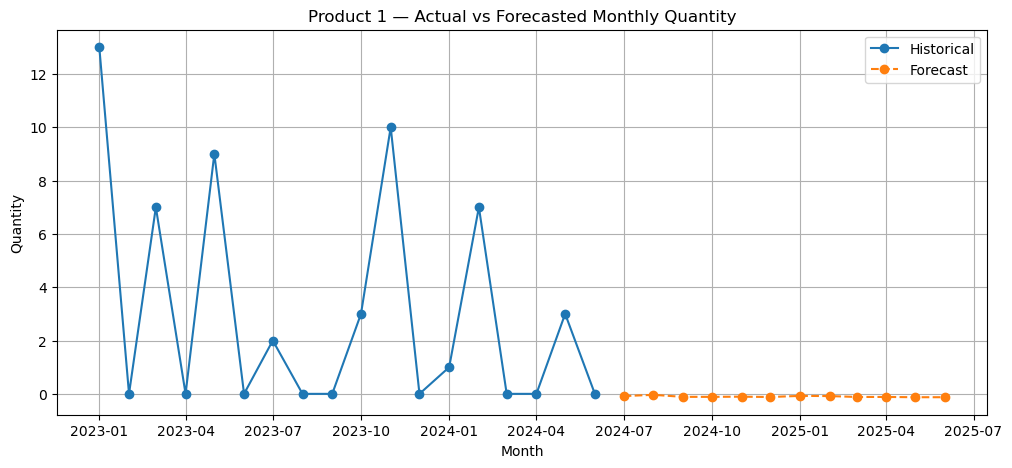

In [53]:
# Actual vs Forecasted Demand Plot

import matplotlib.pyplot as plt

# Historical data
hist_data = dfm[dfm["product_id"] == example_pid][["year_month", "monthly_qty"]]

# Future forecast
future_data = future_forecast[future_forecast["product_id"] == example_pid][["year_month", "monthly_qty"]]

plt.figure(figsize=(12,5))

plt.plot(hist_data["year_month"], hist_data["monthly_qty"], label="Historical", marker="o")
plt.plot(future_data["year_month"], future_data["monthly_qty"], label="Forecast", marker="o", linestyle="--")

plt.title(f"Product {example_pid} — Actual vs Forecasted Monthly Quantity")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.legend()
plt.grid(True)
plt.show()


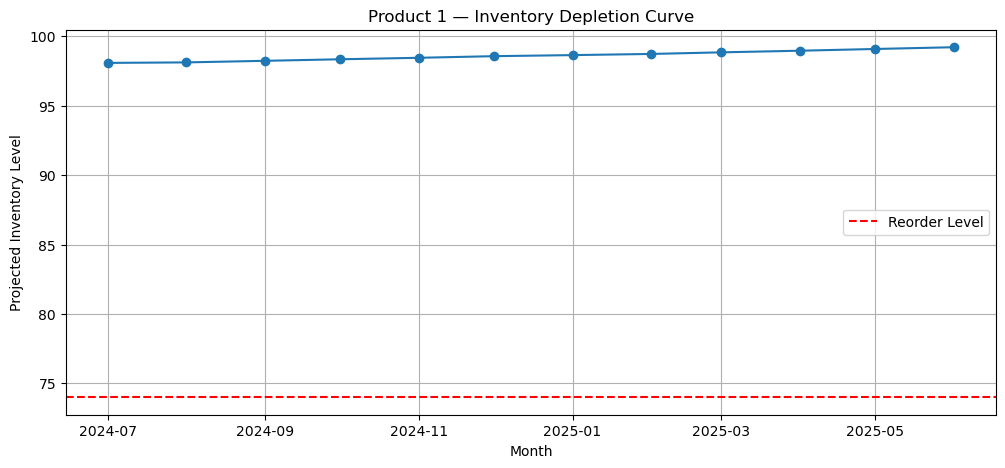

In [54]:
# Inventory Depletion Curve
# Extract product data
prod = future_forecast[future_forecast["product_id"] == example_pid].copy()

# Start inventory
start_stock = dfm[dfm["product_id"] == example_pid]["current_stock"].iloc[0]

# Calculate month-by-month remaining stock
inventory_levels = []
stock = start_stock

for demand in prod["monthly_qty"]:
    stock -= demand
    inventory_levels.append(stock)

plt.figure(figsize=(12,5))
plt.plot(prod["year_month"], inventory_levels, marker="o")
plt.axhline(
    y=dfm[dfm["product_id"] == example_pid]["reorder_level"].iloc[0], 
    color='red', 
    linestyle='--', 
    label="Reorder Level"
)
plt.title(f"Product {example_pid} — Inventory Depletion Curve")
plt.xlabel("Month")
plt.ylabel("Projected Inventory Level")
plt.legend()
plt.grid(True)
plt.show()


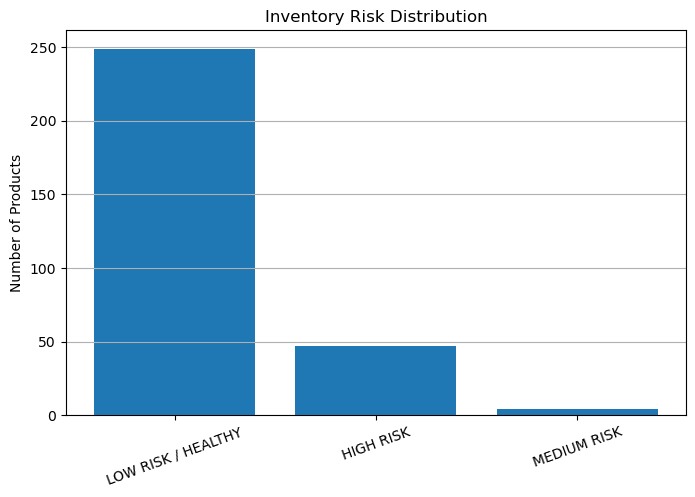

In [55]:
# Risk Category Summary Chart

risk_counts = inventory_risk["risk_level"].value_counts()

plt.figure(figsize=(8,5))
plt.bar(risk_counts.index, risk_counts.values)
plt.title("Inventory Risk Distribution")
plt.ylabel("Number of Products")
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()


# Streamlit Application Overview

The final step of the Sales and Inventory Forecasting System involves creating an interactive Streamlit application that allows users to explore forecasts, view inventory risks, and analyze product behavior without writing code. The application serves as the operational interface for the forecasting engine, enabling real-time decision support for sales, operations, and supply chain teams.

The Streamlit app integrates the outputs from previous steps, including historical demand, forecasted quantities, inventory projections, reorder recommendations, and risk categorizations. By providing dynamic visualizations and user-selectable product views, the app transforms the forecasting model into an accessible and practical business tool.

Key features of the Streamlit application include:

### 1. Product-Level Dashboard
Users can select any product to display:
- Historical vs. forecasted monthly demand  
- Inventory depletion curves  
- Expected stockout dates  
- Recommended reorder month and quantity  

### 2. Risk Overview Page
A summary page displays:
- Total number of products in each risk category  
- Distribution of Critical, High, Medium, and Low-risk items  
- Quick filtering of products requiring urgent action  

### 3. Data Exploration
Interactive tables allow users to browse:
- Forecast results  
- Inventory projections  
- Risk classifications  

This step elevates the forecasting system from a technical model into a comprehensive analytics solution suitable for operational use.
